In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
btc_15m = pd.read_csv ('./btc_15m.csv', encoding='unicode_escape')

In [53]:
btc_15m.shape

(9735, 14)

In [54]:
btc_15m = btc_15m[6000:]
len(btc_15m)

3735

In [55]:
btc_15m['time'] = btc_15m['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_15m['time'] = pd.to_datetime(btc_15m["time"])
btc_15m.set_index("time", inplace = True)

In [56]:
def buySell_RSI(btc_15m):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_15m)):
    if (btc_15m ['close'][i] >= btc_15m ["Upper ATR 3"][i] and btc_15m ['Volume'][i] > btc_15m["Volume"].mean() and btc_15m ['RSI'][i] > 70):
      if flag != 1:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_15m['close'][i])
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_15m ['close'][i] <= btc_15m ["Lower ATR 1"][i]):
      if flag != 0:
        sigPriceBuy.append(btc_15m["close"][i])
        sigPriceSell.append(np.nan)
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [57]:
buySell_RSI = buySell_RSI(btc_15m)
btc_15m['Buy Signal ATR'] = buySell_RSI[0]
btc_15m['Sell Signal ATR'] = buySell_RSI[1]
# To show the data
btc_15m.head()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Buy Signal ATR,Sell Signal ATR
time,,,,,,,,,,,,,,,
2022-10-18 17:45:00,19369.5,3590.150,19404.79010,19476.49634,19502.63959,19515.03495,19497.36559,19537.69692,19415.29576,19660.09808,19292.89460,7.750082,34.808716,19369.5,NaN
2022-10-18 18:00:00,19390.5,2720.365,19401.61452,19468.67849,19496.23161,19510.58727,19495.24944,19529.29331,19408.06366,19650.52296,19286.83401,18.735645,38.049916,NaN,NaN
2022-10-18 18:15:00,19370.0,2653.206,19394.58907,19459.70772,19489.01838,19505.56630,19492.76925,19520.20720,19399.20824,19641.20616,19278.20928,27.916525,36.159911,NaN,NaN
2022-10-18 18:30:00,19394.5,1490.492,19394.56928,19453.77974,19483.61733,19501.59965,19490.82332,19513.74354,19393.81594,19633.67115,19273.88833,33.211128,39.995981,NaN,NaN
2022-10-18 18:45:00,19406.0,1586.323,19397.10944,19449.43613,19479.18205,19498.18537,19489.14366,19508.18823,19390.68403,19625.69244,19273.17982,42.573625,41.764845,NaN,NaN


In [58]:
btc_15m.describe()

,close,Volume,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 1,Lower ATR 1,Upper ATR 3,Lower ATR 3,K,RSI,Buy Signal ATR,Sell Signal ATR
count,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.000000,12.000000,11.000000
mean,18554.995716,1770.214997,18557.658753,18562.794409,18567.967606,18576.332476,18594.028385,18633.138442,18492.450375,18773.826509,18351.762308,5.023193e+01,49.404115,19052.666667,18993.318182
std,1841.470846,3193.726312,1838.707020,1834.461049,1830.223828,1822.817587,1804.784227,1824.694352,1845.964271,1810.477954,1874.047562,3.064369e+01,10.556062,1803.381323,1814.997786
min,15632.500000,81.943000,15711.060560,15736.575380,15757.135210,15787.765520,15869.890500,15792.017280,15679.257550,15902.901090,15174.543140,-2.960000e-14,13.693656,16389.500000,16014.000000
25%,16642.000000,517.388000,16641.624975,16637.065915,16633.735565,16636.861540,16661.203190,16689.868670,16591.031595,16806.077470,16475.247925,2.175252e+01,42.729375,17199.375000,17285.250000
50%,19138.500000,912.118000,19140.358900,19141.307520,19137.298240,19132.623530,19153.426280,19165.078550,19116.252670,19217.710030,19020.670230,5.077277e+01,48.920124,19384.250000,19463.000000
75%,20438.500000,1770.725500,20439.367560,20446.757175,20450.754510,20456.320320,20455.564345,20492.315415,20396.057930,20586.244400,20280.668945,7.811431e+01,55.727655,20533.000000,20487.500000
max,21444.500000,70768.354000,21397.969050,21365.925620,21321.677970,21298.381490,21240.912680,21405.652910,21327.470420,21506.773100,21250.560010,1.000000e+02,93.411165,21313.000000,20853.500000


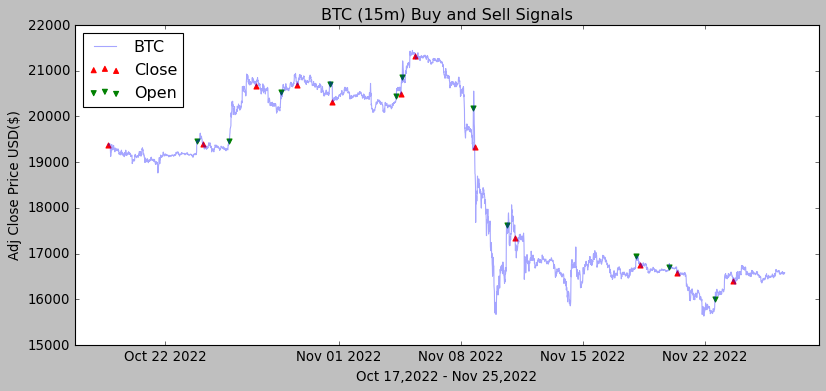

In [59]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_15m['close'], label='BTC', alpha=0.35)
plt.plot(btc_15m['Buy Signal ATR'], label='', alpha=0.35)
plt.plot(btc_15m['Sell Signal ATR'],label='', alpha=0.35)
plt.scatter(btc_15m.index, btc_15m['Buy Signal ATR'], label ='Close', marker='^',color='red')
plt.scatter(btc_15m.index, btc_15m['Sell Signal ATR'],label='Open', marker='v', color='green')
plt.title('BTC (15m) Buy and Sell Signals')
plt.xlabel("Oct 17,2022 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()